In [2]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = 'diabetes2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Explore dataset statistics and missing values


In [3]:
# Explore dataset statistics and check for missing values
data_statistics = data.describe()
missing_values = data.isnull().sum()

# Display the statistics and missing values
print("Dataset Statistics:\n")
print(data_statistics)

print("\nMissing Values:\n")
print(missing_values)


Dataset Statistics:

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

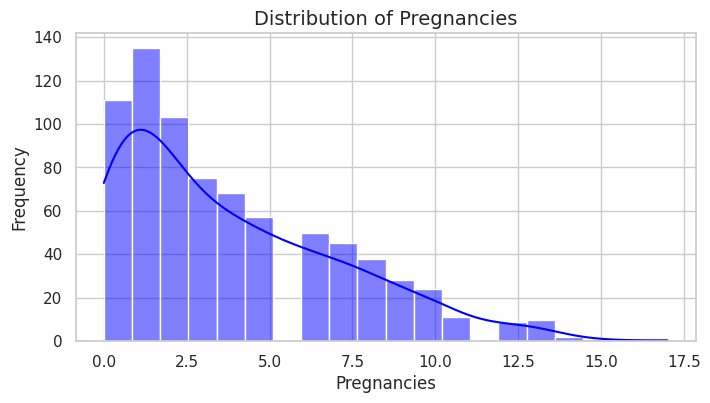

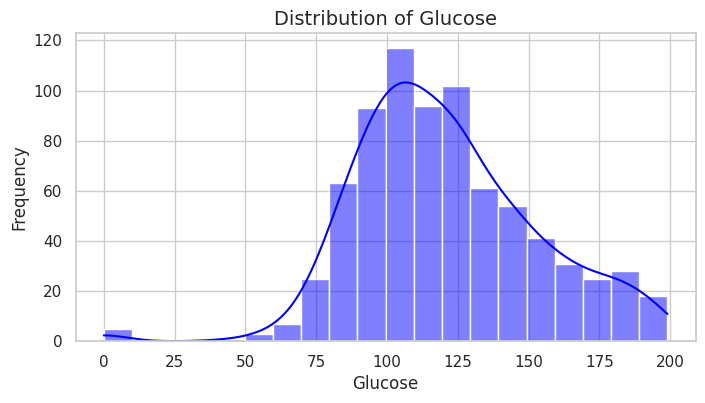

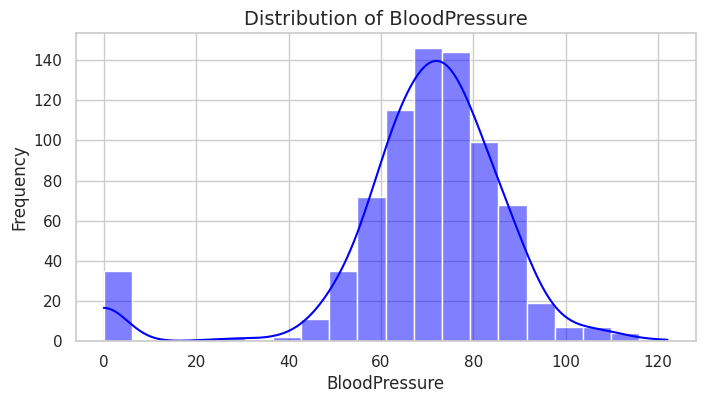

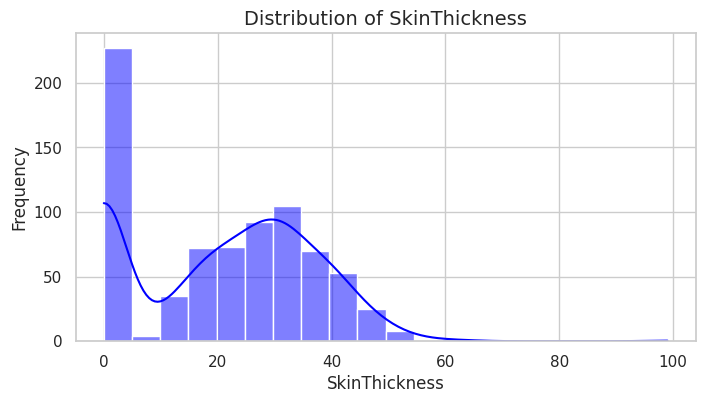

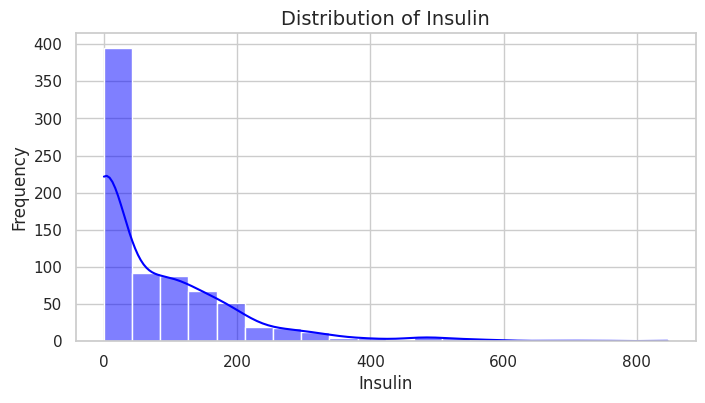

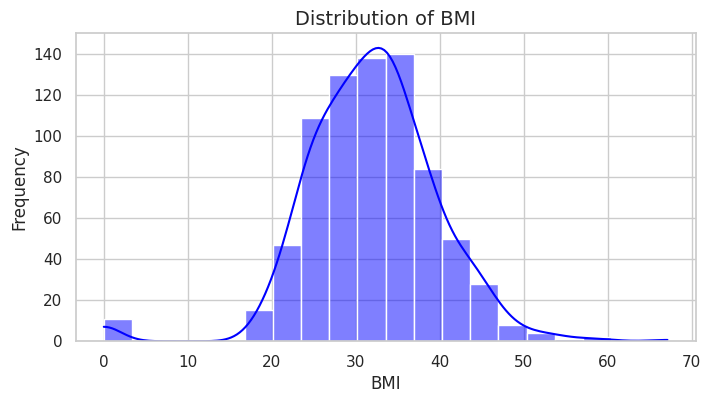

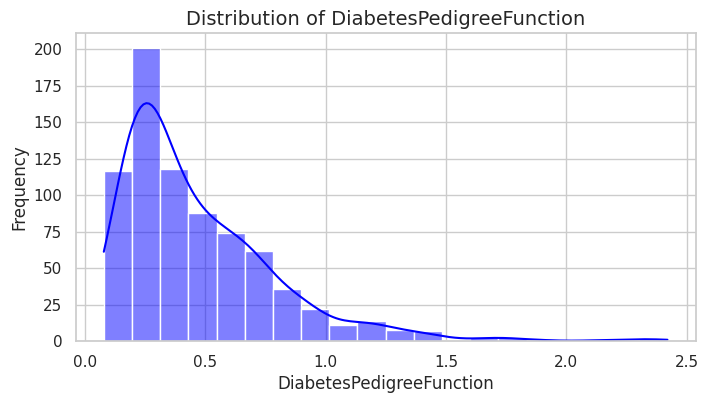

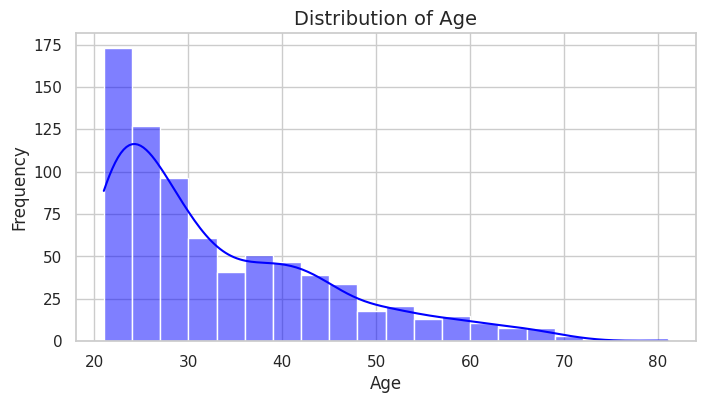

<ipython-input-4-31478fd9d52d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Outcome'], palette="viridis")


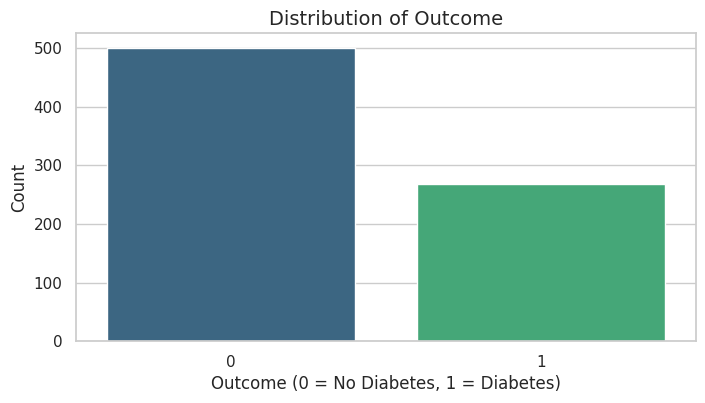

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visual style
sns.set(style="whitegrid")

# Plot the distribution of each feature
for column in data.columns[:-1]:  # Exclude 'Outcome' as it's the target variable
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot the distribution of the target variable 'Outcome'
plt.figure(figsize=(8, 4))
sns.countplot(x=data['Outcome'], palette="viridis")
plt.title('Distribution of Outcome', fontsize=14)
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()


Plot correlations between features and Outcome



<ipython-input-5-b07f427a6998>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_outcome.index, y=correlations_with_outcome.values, palette="coolwarm")


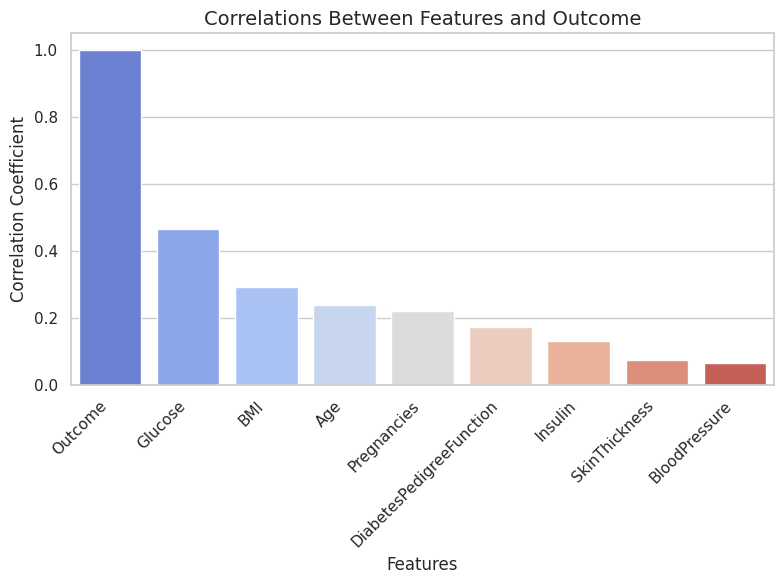

In [5]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the target variable 'Outcome'
correlations_with_outcome = correlation_matrix["Outcome"].sort_values(ascending=False)

# Plot the correlations with 'Outcome'
plt.figure(figsize=(8, 6))
sns.barplot(x=correlations_with_outcome.index, y=correlations_with_outcome.values, palette="coolwarm")
plt.title("Correlations Between Features and Outcome", fontsize=14)
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Train a decision tree model.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and target
X = data.drop(columns=["Outcome"])  # Features
y = data["Outcome"]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
accuracy, report


(0.7467532467532467,
 '              precision    recall  f1-score   support\n\n           0       0.83      0.76      0.79        99\n           1       0.62      0.73      0.67        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.74      0.73       154\nweighted avg       0.76      0.75      0.75       154\n')